# File Setup

In [1]:
#dependecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
df = pd.read_csv('Resources/clean_merge_df.csv')
df.head()

,Title,Offering Medium,Genre,Available Languages,Country,Advisory Rating,Age Advisory Rating,Year Released,Available to Public on,Runtime,Duration,Director,Cast,Awards,Metascore,Rotten Tomatoes Score,IMDB Score,IMDB Votes,Disney+
0,10 Things I Hate About You,Movie,"Comedy, Drama, Romance","English, French",USA,PG-13,16+,1999,"November 12, 2019",97.0,NaN,Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",2 wins & 13 nominations.,70.0,67.0,7.3,NaN,1
1,101 Dalmatian Street,TV Show,"Animation, Comedy, Family",English,"UK, USA, Canada",TV-Y7,7+,2018,"February 28, 2020",NaN,1.0,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",NaN,NaN,44.0,6.2,124.0,1
2,101 Dalmatians,Movie,"Adventure, Comedy, Crime, Family","English, Spanish","USA, UK",G,NaN,1996,"November 12, 2019",103.0,NaN,Stephen Herek,"Glenn Close, Jeff Daniels, Joely Richardson, J...",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,21.0,5.7,NaN,1
3,101 Dalmatians 2: Patch's London Adventure,Movie,"Animation, Adventure, Comedy, Family, Musical",English,USA,G,NaN,2002,"November 12, 2019",74.0,NaN,"Jim Kammerud, Brian Smith","Barry Bostwick, Jason Alexander, Martin Short,...",5 wins & 10 nominations.,NaN,NaN,5.8,NaN,1
4,102 Dalmatians,Movie,"Adventure, Comedy, Family",English,"USA, UK",G,all,2000,"November 12, 2019",100.0,NaN,Kevin Lima,"Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,60.0,4.9,NaN,1


In [3]:
#separating movies and tv shows
movie_df = df.loc[df['Offering Medium'] == 'Movie']
tv_df = df.loc[df['Offering Medium'] == 'TV Show']

In [39]:
#advisory ratings raw
advisory_rating_mov_x = movie_df.loc[:,'Advisory Rating'].value_counts().index.tolist()
advisory_rating_mov_y = movie_df.loc[:,'Advisory Rating'].replace('APPROVED', 'Approved').value_counts().to_list()

#advisory ratings clean
advisory_rating_mov_x = advisory_rating_mov_x[0:5]
advisory_rating_mov_x.append('Other')

other_count = sum(advisory_rating_mov_y[5:-1])
advisory_rating_mov_y = advisory_rating_mov_y[0:5]
advisory_rating_mov_y.append(other_count)

#printing to see
print(advisory_rating_mov_x)
print(advisory_rating_mov_y)

['G', 'PG', 'TV-G', 'Approved', 'TV-PG', 'Other']
[209, 156, 117, 60, 48, 71]


In [40]:
#advisory ratings raw
advisory_rating_tv_x = movie_df.loc[:,'Advisory Rating'].value_counts().index.tolist()
advisory_rating_tv_y = movie_df.loc[:,'Advisory Rating'].replace('APPROVED', 'Approved').value_counts().to_list()

#advisory ratings clean
advisory_rating_tv_x = advisory_rating_tv_x[0:5]
advisory_rating_tv_x.append('Other')

other_count = sum(advisory_rating_tv_y[5:-1])
advisory_rating_tv_y = advisory_rating_tv_y[0:5]
advisory_rating_tv_y.append(other_count)

#printing to see
print(advisory_rating_tv_x)
print(advisory_rating_tv_y)

['G', 'PG', 'TV-G', 'Approved', 'TV-PG', 'Other']
[209, 156, 117, 60, 48, 71]


<BarContainer object of 6 artists>

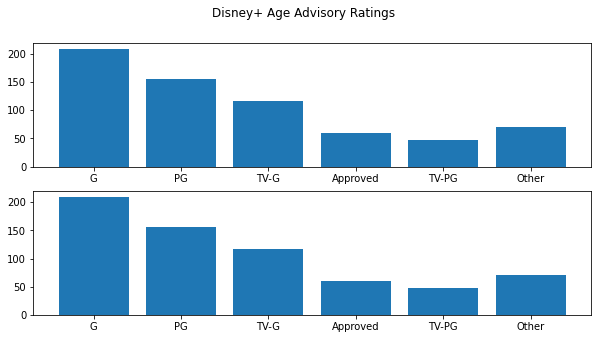

In [69]:
fig, (gr0, gr1) = plt.subplots(2, 1, figsize = (10,5))
fig.suptitle("Disney+ Age Advisory Ratings")
gr0.bar(advisory_rating_mov_x, advisory_rating_mov_y)
gr1.bar(advisory_rating_tv_x, advisory_rating_tv_y)


# Individual
- Summary statistics table
total number of offerings
Min, max, avg of runtime/duration
Most frequent
Ratings (e.g. PG-13)
Country, language

- All Ratings (RT and IMDB)
Box plt
Which streaming service has higher quality offerings

- Count % of subgenre of movie, of show
pie chart (top 10, then add rest into other)
which streaming service appeals to which taste
what is the genre niche

- Count % of “Age Advisory Rating” per streaming platform
Pie chart
Understand the biggest audience for each

- Groupby Year -> Date Added -> Count
- Groupby Year -> Release Year -> count
Overlayed Line graph of both
How up-to-date each streaming service stays
How it correlates with release year of new movies/shows

- Groupby Month -> Date Added -> Count
Line graph
Reveal if there is a schedule or a popular time to add movies for (maybe they add a lot in face of holidays like December?)
